# Spam Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("SMSSpamCollection.tsv",sep='\t', names=['label','text'])
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

In [4]:
# for i in range(5):
#     print(df.iloc[i,-1],'\n')

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [6]:
sn = SnowballStemmer('english')
stop = set(stopwords.words('english'))


## Cleaning the text data

In [7]:
def clean_text(sms):
    sms = sms.lower() # reduce the dimensionality
    sms = re.sub("[^a-z0-9]",' ',sms) # include a-z, 0-9
    sms = nltk.word_tokenize(sms) # tokenize the words 
    sms = [t for t in sms if len(t)>1] #reducing the dimensionality
    sms = [sn.stem(word) for word in sms if word not in stop] # stem the words reduces dimensonality
    sms = ' '.join(sms)
    return sms

In [8]:
clean_text("Hello !! MF what a Sudden surpRISE !@# 100Rs free")

'hello mf sudden surpris 100rs free'

In [9]:
df['cleanText'] = df['text'].apply(clean_text)

In [10]:
df

,label,text,cleanText
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi great world l...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,dun say earli hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,2nd time tri contact 750 pound prize claim eas...
5568,ham,Will ü b going to esplanade fr home?,go esplanad fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",piti mood suggest
5570,ham,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...


In [11]:
from wordcloud import WordCloud

In [12]:
hamData = df[df["label"]=='ham']
hamData = hamData['cleanText'].values

In [29]:
spamData = df[df["label"]=='spam']
spamData = spamData['cleanText'].values

In [27]:
def wordCloud(data):
    words = ' '.join(data)
    wc = WordCloud(background_color='white')
    wc = wc.generate(words)

    plt.figure(figsize=(10,8))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

Ham data words 


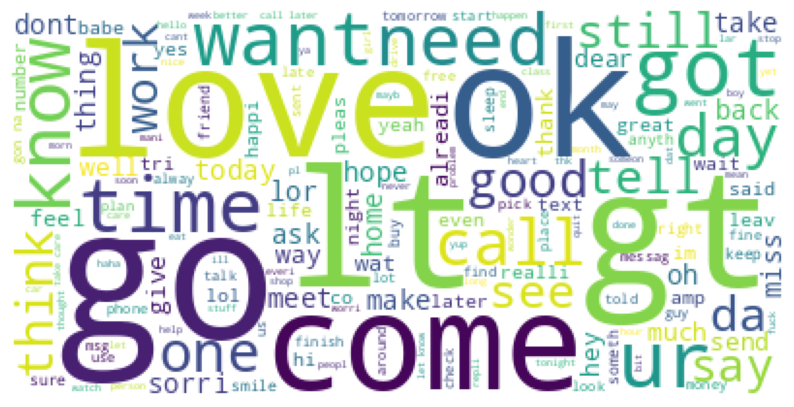

In [31]:
print("Ham data words ")
wordCloud(hamData)

Spam data words 


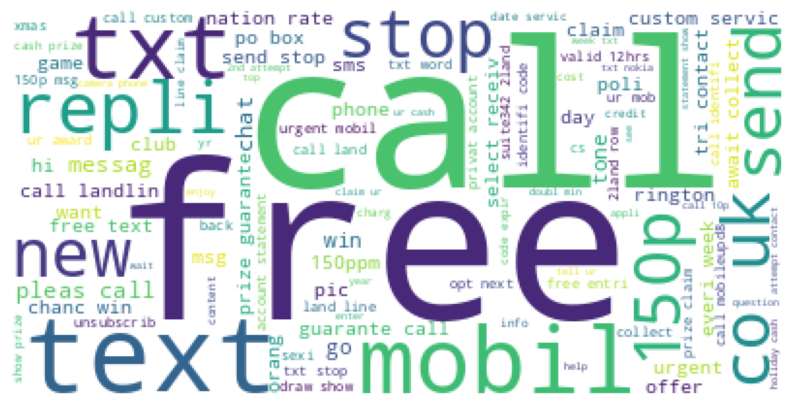

In [30]:
print("Spam data words ")
wordCloud(spamData)

## Featurization

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
cv = CountVectorizer()

In [37]:
X = cv.fit_transform(df['cleanText']).toarray()

In [39]:
X.shape

(5572, 7242)

In [56]:
y = pd.get_dummies(df['label'])
y = y['spam'].values

In [57]:
y

array([False, False,  True, ..., False, False, False])

## Modelling

In [59]:
from sklearn.model_selection import train_test_split

In [61]:
XT,Xt,yT,yt =  train_test_split(X,y,test_size=0.2,random_state=0)

In [62]:
from sklearn.naive_bayes import MultinomialNB

In [93]:
model = MultinomialNB(alpha=1.5)

In [94]:
model.fit(XT,yT)

MultinomialNB(alpha=1.5)

In [95]:
y_pred = model.predict(Xt)

In [96]:
yt,y_pred

(array([False,  True, False, ..., False,  True, False]),
 array([False,  True, False, ..., False,  True, False]))

In [97]:
pd.DataFrame({'Actual':yt, 'Predicted':y_pred}).head(10)

,Actual,Predicted
0,False,False
1,True,True
2,False,False
3,False,False
4,False,False
5,False,False
6,True,True
7,False,False
8,False,False
9,False,False


## Evaluation

In [98]:
print("Acuuracy on training data:")
print(model.score(XT,yT))

Acuuracy on training data:
0.9921471842046219


In [100]:
print("Acuuracy on test data:")
print(model.score(Xt,yt ))

Acuuracy on test data:
0.9847533632286996


In [80]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report

In [83]:
confusion_matrix(yt,y_pred)

array([[943,  12],
       [  6, 154]])

In [84]:
print(classification_report(yt,y_pred))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       955
        True       0.93      0.96      0.94       160

    accuracy                           0.98      1115
   macro avg       0.96      0.97      0.97      1115
weighted avg       0.98      0.98      0.98      1115



In [85]:
f1_score(yt,y_pred)

0.9447852760736196